# Importing All Libraries

In [1]:
# Import necessary libraries for data manipulation, numerical operations, data visualization, and machine learning
import pandas as pd                                   # For data manipulation and analysis
import numpy as np                                    # For numerical operations

import matplotlib.pyplot as plt                       # For data visualization
from matplotlib.colors import ListedColormap          # For customizing colormap in visualizations
import seaborn as sns                                 # For data visualization with statistical plots

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # For scaling data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # For model evaluation metrics
from sklearn.ensemble import GradientBoostingClassifier    # For Gradient Boosting classification model

import logging 

# Setting up logging to capture and report events during code execution
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Libraries imported successfully.')


2024-06-15 16:17:27,713 - INFO - Libraries imported successfully.


# Loading Data Sets

#### 1: Historical Data

In [5]:
# Load historical sensor data with exception handling
try:
    historical_data_path = 'data/historical_sensor_data.csv'  # Path to the CSV file containing historical sensor data
    historical_data = pd.read_csv(historical_data_path)  # Read the CSV file into a DataFrame
    logging.info(f'Historical data loaded successfully from {historical_data_path}')  # Log success message

except FileNotFoundError as e:
    logging.error(f'File not found: {e}')  # Log an error message if the file is not found
    historical_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback

except pd.errors.EmptyDataError as e:
    logging.error(f'Empty data error: {e}')  # Log an error message if the file is empty
    historical_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback

except Exception as e:
    logging.error(f'An error occurred: {e}')  # Log any other exceptions that occur
    historical_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback


2024-06-15 16:20:03,062 - INFO - Historical data loaded successfully from data/historical_sensor_data.csv


In [6]:
# Display the first few rows of the dataset, if loaded
if not historical_data.empty:
    logging.info('Displaying the first 10 rows of the historical data:')  # Log message indicating data display
    print(historical_data.head(10))  # Print the first 10 rows of the DataFrame to the console
else:
    logging.warning('Historical data is not available.')  # Log warning if the DataFrame is empty

# First few rows of the dataset ( I specified here 10)
historical_data.head(10)



2024-06-15 16:20:05,323 - INFO - Displaying the first 10 rows of the historical data:


   sensor_1  sensor_2  label
0 -0.940230  1.411390    0.0
1  0.266017  0.474068    0.0
2  1.912074  0.456729    1.0
3  0.414918 -0.504954    0.0
4  1.925371  0.129880    1.0
5  0.472834 -1.605436    1.0
6 -1.959070 -0.078401    0.0
7  0.520074  0.614518    0.0
8 -0.228568  0.671351    0.0
9  1.804381  0.231257    1.0


,sensor_1,sensor_2,label
0,-0.940230,1.411390,0.0
1,0.266017,0.474068,0.0
2,1.912074,0.456729,1.0
3,0.414918,-0.504954,0.0
4,1.925371,0.129880,1.0
5,0.472834,-1.605436,1.0
6,-1.959070,-0.078401,0.0
7,0.520074,0.614518,0.0
8,-0.228568,0.671351,0.0
9,1.804381,0.231257,1.0


##### Data Exploration:

In [7]:
# Displaying summary statistics
historical_data.describe()

,sensor_1,sensor_2,label
count,1.500000e+03,1.500000e+03,1500.000000
mean,7.691625e-16,4.553395e-16,0.500000
std,1.000334e+00,1.000334e+00,0.500167
min,-2.111409e+00,-2.379495e+00,0.000000
25%,-6.928830e-01,-8.115488e-01,0.000000
50%,1.507218e-02,2.543699e-02,0.500000
75%,6.883569e-01,8.214696e-01,1.000000
max,2.230230e+00,2.274244e+00,1.000000


In [8]:
# Checking for missing values
missing_values = historical_data.isnull().sum()

missing_values

sensor_1    0
sensor_2    0
label       0
dtype: int64

In [149]:
# Displaying data types
data_types = historical_data.dtypes
data_types

sensor_1    float64
sensor_2    float64
label       float64
dtype: object

###### 2: Latest Sensor Data

In [9]:
# Load latest sensor data with exception handling
try:
    latest_data_path = 'data/latest_sensor_data.csv'  # Path to the CSV file containing latest sensor data
    latest_data = pd.read_csv(latest_data_path)  # Read the CSV file into a DataFrame
    logging.info(f'Latest data loaded successfully from {latest_data_path}')  # Log success message

except FileNotFoundError as e:
    logging.error(f'File not found: {e}')  # Log an error message if the file is not found
    latest_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback

except pd.errors.EmptyDataError as e:
    logging.error(f'Empty data error: {e}')  # Log an error message if the file is empty
    latest_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback

except Exception as e:
    logging.error(f'An error occurred: {e}')  # Log any other exceptions that occur
    latest_data = pd.DataFrame()  # Initialize an empty DataFrame as a fallback


2024-06-15 16:23:21,966 - INFO - Latest data loaded successfully from data/latest_sensor_data.csv


In [10]:
# Display the first few rows of the dataset, if loaded
if not latest_data.empty:
    logging.info('Displaying the first 10 rows of the latest sensor data:')  # Log message indicating data display
    print(latest_data.head(10))  # Print the first 10 rows of the DataFrame to the console
else:
    logging.warning('Latest sensor data is not available.')  # Log warning if the DataFrame is empty

# First few rows of the dataset (here I specified 10)
latest_data.head(10)



2024-06-15 16:24:50,371 - INFO - Displaying the first 10 rows of the latest sensor data:


   sensor_1  sensor_2
0  1.662361  0.465601
1  2.335964  0.670073
2  1.143369  0.732111
3  1.629260  1.322346
4  0.816851  1.795098
5  1.253603  0.766365
6  1.878353  0.317607
7  0.757028  1.928988
8  2.617641  0.600220
9  2.022991  0.685932


,sensor_1,sensor_2
0,1.662361,0.465601
1,2.335964,0.670073
2,1.143369,0.732111
3,1.629260,1.322346
4,0.816851,1.795098
5,1.253603,0.766365
6,1.878353,0.317607
7,0.757028,1.928988
8,2.617641,0.600220
9,2.022991,0.685932


###### Data Exploration:

In [12]:
# Displaying summary statistics
latest_data.describe()

,sensor_1,sensor_2
count,42.000000,42.000000
mean,1.407543,1.148582
std,0.892263,0.525011
min,-0.397912,0.160248
25%,0.766698,0.690832
50%,1.447133,1.255488
75%,2.112319,1.590154
max,3.101939,1.997163


In [13]:
# Checking for missing values
missing_values = latest_data.isnull().sum()

missing_values

sensor_1    0
sensor_2    0
dtype: int64

In [14]:
# Displaying data types
data_types = latest_data.dtypes
data_types

sensor_1    float64
sensor_2    float64
dtype: object

# Preparing Data For Modelling


In [15]:
# X and Y label

# Separate the features (X) and the target variable (y) from the historical data
X = historical_data.drop(columns='label')  # Drop the 'label' column to use all other columns as features
y = historical_data['label']  # Assign the 'label' column as the target variable


In [16]:
# Splitting the data into training and testing sets

# Standardize the features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)

# Split the standardized data into training and testing sets
# `test_size=0.2` indicates 20% of the data will be used for testing and 80% for training
# `random_state=42` ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Plotting Data Points

C:\Users\hp\AppData\Local\Temp\ipykernel_16456\457597203.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],


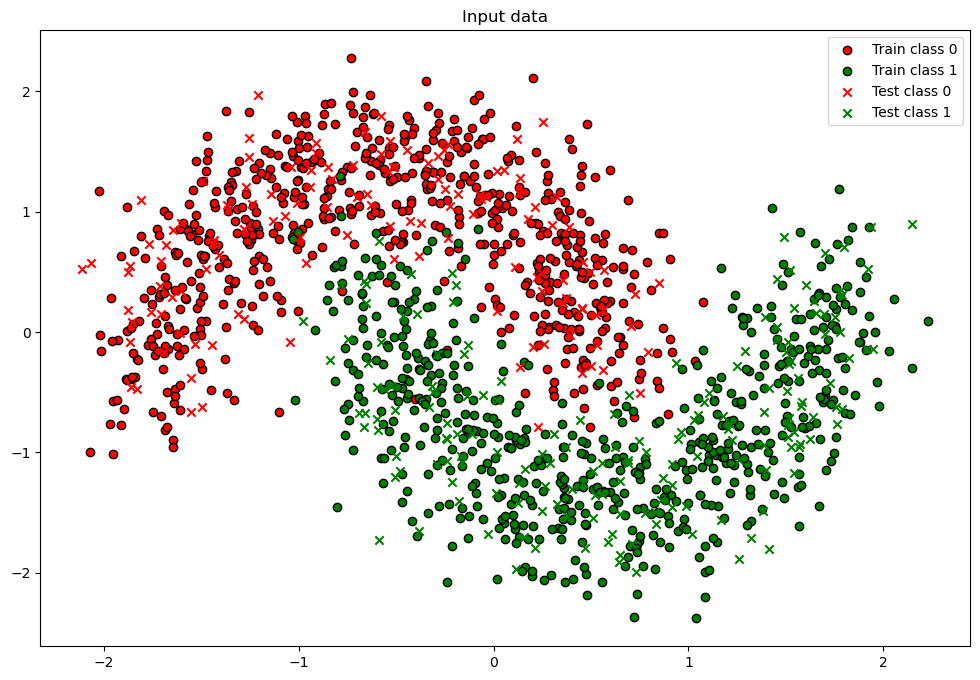

In [17]:
# Plot the data

plt.figure(figsize=(12, 8))  # Create a new figure with a specified size

# Plot training data for class 0
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
            c='red', label='Train class 0', edgecolors='black', marker='o')

# Plot training data for class 1
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
            c='green', label='Train class 1', edgecolors='black', marker='o')

# Plot testing data for class 0
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
            c='red', label='Test class 0', edgecolors='black', marker='x')

# Plot testing data for class 1
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
            c='green', label='Test class 1', marker='x')

plt.title('Input data')  # Add a title to the plot
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot



# Training Model

In [18]:
# Initialize the model
model = GradientBoostingClassifier(random_state=42)  # Initialize Gradient Boosting Classifier with a fixed random state

# Train the model
model.fit(X_train, y_train)  # Fit the model to the training data


GradientBoostingClassifier(random_state=42)

# Model Evaluation

In [19]:
# Make predictions on testing data
y_pred = model.predict(X_test)  # Use the trained model to make predictions on the test set


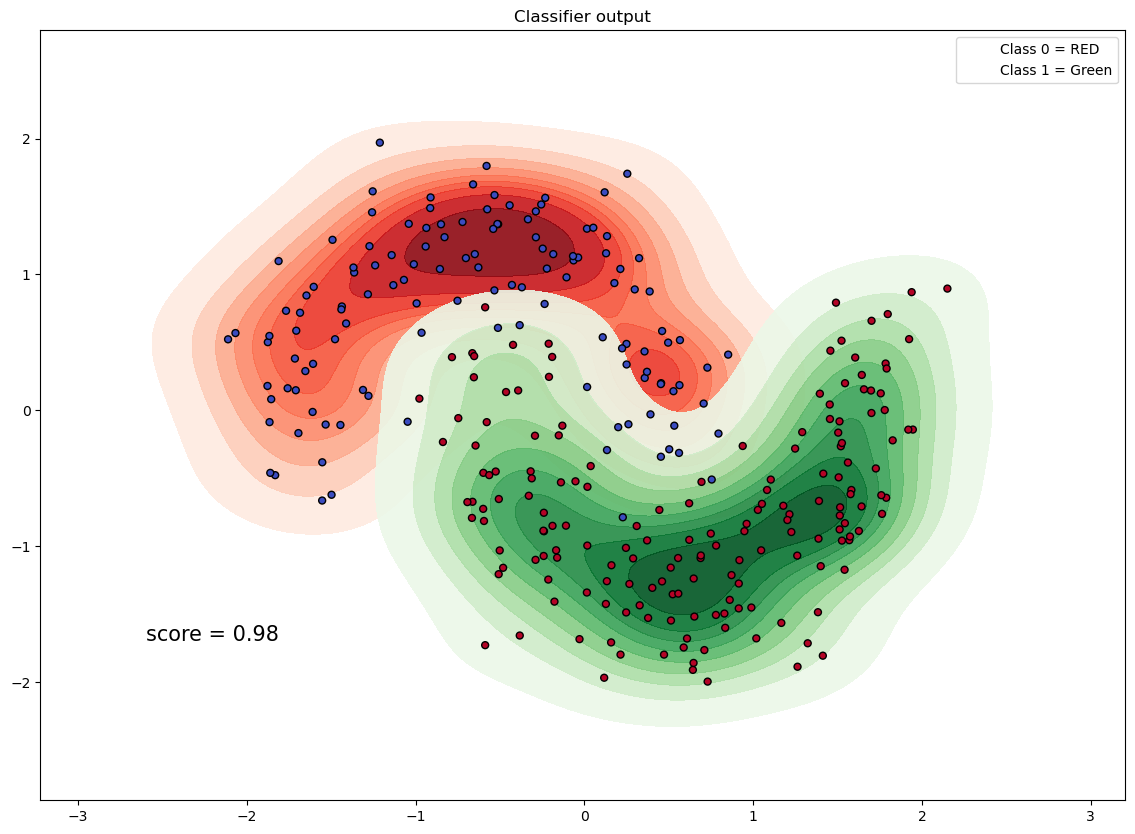

In [20]:
# Plotting the testing points with decision density

plt.figure(figsize=(14, 10))  # Create a new figure with a specified size

# Plot KDE (Kernel Density Estimate) for class 0
sns.kdeplot(x=X_test[y_pred == 0, 0], y=X_test[y_pred == 0, 1], 
            fill=True, cmap="Reds", alpha=0.9, label="Class 0 = RED")

# Plot KDE for class 1
sns.kdeplot(x=X_test[y_pred == 1, 0], y=X_test[y_pred == 1, 1], 
            fill=True, cmap="Greens", alpha=0.9, label="Class 1 = Green")

# Plotting the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=25)

# Add title and score
plt.title('Classifier output')  # Add a title to the plot
plt.text(X_test[:, 0].min() + 0.3, X_test[:, 1].min() + 0.3, 
         ('score = %.2f' % model.score(X_test, y_test)), size=15, horizontalalignment='right')

# Add legend
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


In [21]:
# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Compute the accuracy of the model

# Compute confusion matrix
confusion = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix to evaluate the classification performance

# Generate classification report
report = classification_report(y_test, y_pred)  # Create a detailed classification report

# Log the evaluation metrics
logging.info(f'Model Accuracy: {accuracy}')
logging.info(f'Confusion Matrix:\n{confusion}')
logging.info(f'Classification Report:\n{report}')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')



2024-06-15 16:32:48,777 - INFO - Model Accuracy: 0.98
2024-06-15 16:32:48,781 - INFO - Confusion Matrix:
[[125   3]
 [  3 169]]
2024-06-15 16:32:48,781 - INFO - Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.98      0.98      0.98       172

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Accuracy: 0.98
Confusion Matrix:
[[125   3]
 [  3 169]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.98      0.98      0.98       172

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [22]:
# Print the accuracy of the model
print(f'Accuracy: {accuracy}')

Accuracy: 0.98


Confusion Matrix:


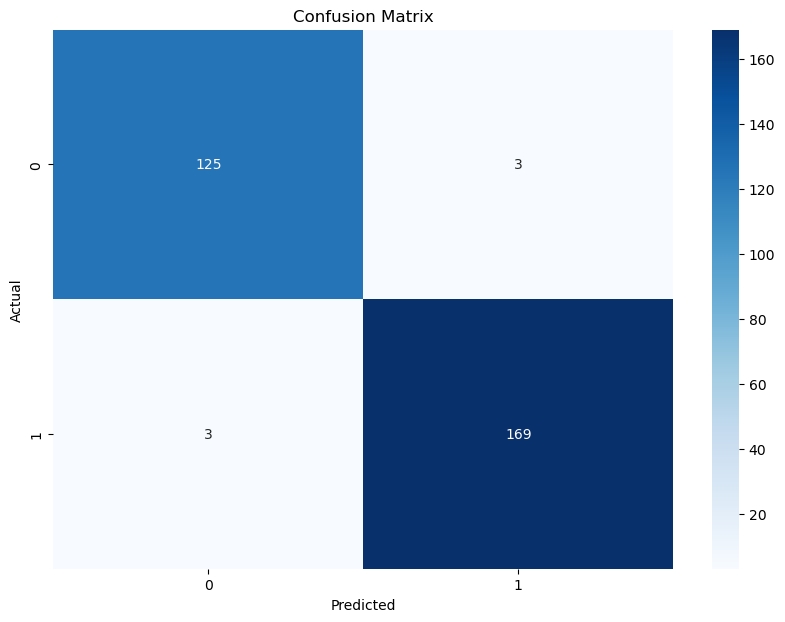

In [23]:
# Print the confusion matrix header
print('Confusion Matrix:')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))  # Create a new figure with a specified size
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')  # Plot the confusion matrix using a heatmap
plt.xlabel('Predicted')  # Label the x-axis as 'Predicted'
plt.ylabel('Actual')  # Label the y-axis as 'Actual'
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Display the plot


In [24]:
# Print the classification report header
print('Classification Report:')

# Print the detailed classification report
print(report)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.98      0.98      0.98       172

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



# Model Inference

In [25]:
# Making predictions on the latest data

# Ensure the latest data is standardized in the same way as the training data
latest_data_scaled = StandardScaler().fit_transform(latest_data)

# Use the trained model to make predictions on the standardized latest data
predictions = model.predict(latest_data_scaled)


In [26]:
#output the Predictions
predictions

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1.])

In [27]:
# Add the predictions as a new column to the latest data
latest_data['predictions'] = predictions

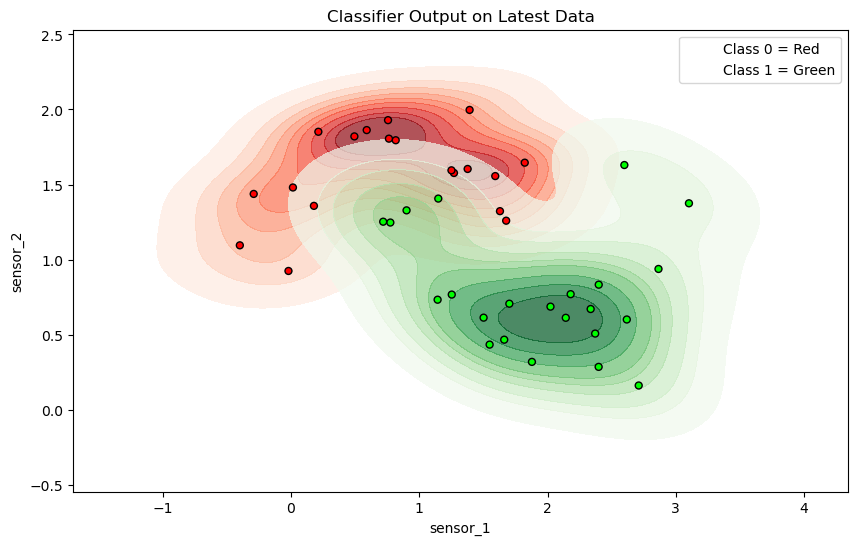

In [28]:
# Create a color map for the plot
cm_bright = ListedColormap(['#FF0000', '#00FF00'])

# Plotting the density plot for the latest data predictions
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size

# Plot KDE for class 0 (latest data)
sns.kdeplot(x=latest_data[latest_data['predictions'] == 0]['sensor_1'],
            y=latest_data[latest_data['predictions'] == 0]['sensor_2'],
            fill=True, cmap="Reds", alpha=0.7, label="Class 0 = Red")

# Plot KDE for class 1 (latest data)
sns.kdeplot(x=latest_data[latest_data['predictions'] == 1]['sensor_1'],
            y=latest_data[latest_data['predictions'] == 1]['sensor_2'],
            fill=True, cmap="Greens", alpha=0.7, label="Class 1 = Green")

# Plotting the latest data points
plt.scatter(latest_data['sensor_1'], latest_data['sensor_2'], c=latest_data['predictions'], cmap=cm_bright, edgecolors='k', s=25)

# Add title and legend
plt.title('Classifier Output on Latest Data')  # Add a title to the plot
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


# Saving The Model

In [44]:
import joblib
scaler=StandardScaler()

# Save the trained model and the scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']